In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
nadia=cv2.imread('../DATA/Nadia_Murad.jpg',0)
denis=cv2.imread('../DATA/Denis_Mukwege.jpg',0)
solvay=cv2.imread('../DATA/solvay_conference.jpg',0)
eu = cv2.imread('../DATA/eu2.jpg',0)

In [5]:
face_cascade=cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')

In [49]:
def detect_face(img):
    face_img=img.copy()
    face_recs=face_cascade.detectMultiScale(face_img)
    
    for(x,y,w,h) in face_recs:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(0,0,255),5)
    
    return face_img

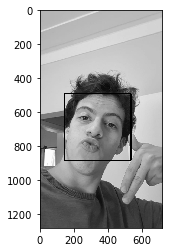

In [50]:
result= detect_face(eu)
plt.imshow(result,cmap='gray')

In [51]:
def adj_detect_face(img):
    face_img=img.copy()
    face_recs=face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=3)
    
    for(x,y,w,h) in face_recs:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    
    return face_img

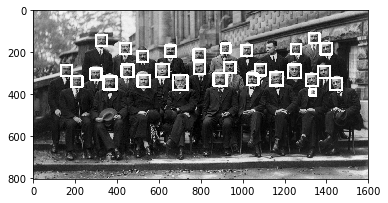

In [52]:
result= adj_detect_face(solvay)
plt.imshow(result,cmap='gray')

In [53]:
eye_cascade=cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')



In [70]:
def detect_eyes(img):
    face_img=img.copy()
    face_recs=eye_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=3)
    
    for(x,y,w,h) in face_recs:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(0,255,0),3)
    
    return face_img

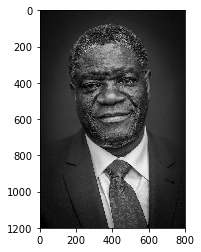

In [71]:
result= detect_eyes(denis)
plt.imshow(result,cmap='gray')

In [72]:
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
    frame = detect_eyes(frame)
 
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()
        